# Deep Learning

In [2]:
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 

import IPython.display as ipd

import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


In [3]:
ipd.Audio('/home/alejandro/Escritorio/Proyecto final/blender.wav')

In [4]:
data, sampling_rate = librosa.load('/home/alejandro/Escritorio/Proyecto final/blender.wav')

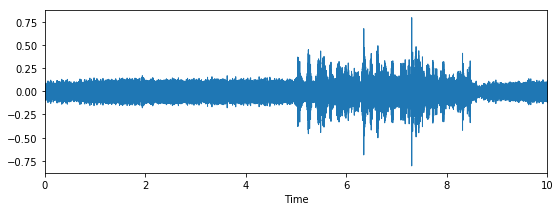

In [5]:
plt.figure(figsize=(9, 3))
librosa.display.waveplot(data, sr=sampling_rate)

In [6]:
data1 = pd.read_csv('./Sonidos de casa/data_momento_aux.csv')
data2 = pd.read_csv('./Sonidos de casa/data_momento_aux_shaver.csv')
data3 = pd.read_csv('./Sonidos de casa/data_momento_aux_hairdryer.csv')
data4 = pd.read_csv('./Sonidos de casa/data_momento_aux_airconditioner.csv')
data5 = pd.read_csv('./Sonidos de casa/data_momento_aux_cellphone.csv')
data6 = pd.read_csv('./Sonidos de casa/data_momento_aux_comp_type.csv')
data7 = pd.read_csv('./Sonidos de casa/data_momento_aux_shower.csv')
data8 = pd.read_csv('./Sonidos de casa/data_momento_aux_vacuum_silence_dryer.csv')
data9 = pd.read_csv('./Sonidos de casa/data_momento_aux_blender_doorbell.csv')
data10 = pd.read_csv('./Sonidos de casa/data_momento_aux_alarm_faucet_microwave.csv')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10])

In [7]:
data_deep = data.loc[:, data.columns != 'momento_aux']
X = np.array(data_deep.scom.tolist())
y = np.array(data.momento_aux.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

In [8]:
num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.fit(X, y, batch_size=32, epochs=5, validation_data=(val_x, val_y))

ValueError: Error when checking input: expected dense_1_input to have shape (40,) but got array with shape (1,)